In [69]:

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics

data = pd.read_csv('C:/Users/HOANG NAM/Desktop/Khai thác DL/lab4/adult_train.csv')
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [70]:
data = data.drop(['fnlwgt'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age                32561 non-null int64
workclass          32561 non-null object
education          32561 non-null object
educational-num    32561 non-null int64
marital-status     32561 non-null object
occupation         32561 non-null object
relationship       32561 non-null object
race               32561 non-null object
gender             32561 non-null object
capital-gain       32561 non-null int64
capital-loss       32561 non-null int64
hours-per-week     32561 non-null int64
native-country     32561 non-null object
income             32561 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


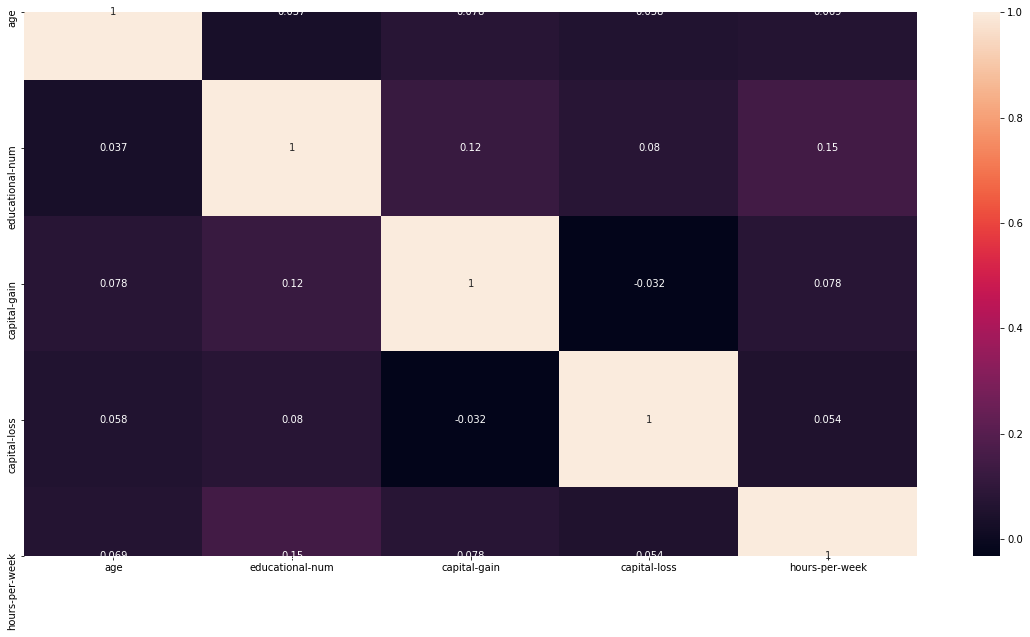

In [71]:
#Khảo sát độ tương đồng giữa các cột với nhau
plt.figure (figsize=(20,10))
sns.heatmap(data.corr( method='pearson' ),annot=True)


In [72]:
#Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một
#phần chứa riêng thuộc tính quyết định.
features = data.drop( 'income' , axis=1)
labels = data[ 'income' ]


In [73]:
features.select_dtypes(exclude=['int64']).columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

In [74]:
#Chuyển đổi các cột không phải dạng số về dạng one-hot vector
features_onehot=pd.get_dummies ( features , columns =features.select_dtypes(exclude=['int64']).columns)
features_onehot


,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32557,40,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32558,58,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32559,22,9,0,0,20,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [75]:
#Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử như ban đầu.
X_train = features_onehot[: 30162] 
X_test = features_onehot[30162:] 
y_train = labels[ :30162]
y_test = labels[30162:]


In [76]:
#Xây dựng cây ID3
clf=tree.DecisionTreeClassifier(criterion="entropy", random_state=0) 
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [77]:
#áp dụng mô hình trên dữ liệu kiểm thử.
tree_pred = clf.predict(X_test)
tree_score=metrics.accuracy_score(y_test, tree_pred) 
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))


Accuracy: 0.822842851187995
Report:               precision    recall  f1-score   support

       <=50K       0.88      0.89      0.88      1795
        >50K       0.65      0.63      0.64       604

    accuracy                           0.82      2399
   macro avg       0.77      0.76      0.76      2399
weighted avg       0.82      0.82      0.82      2399



In [78]:
#ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

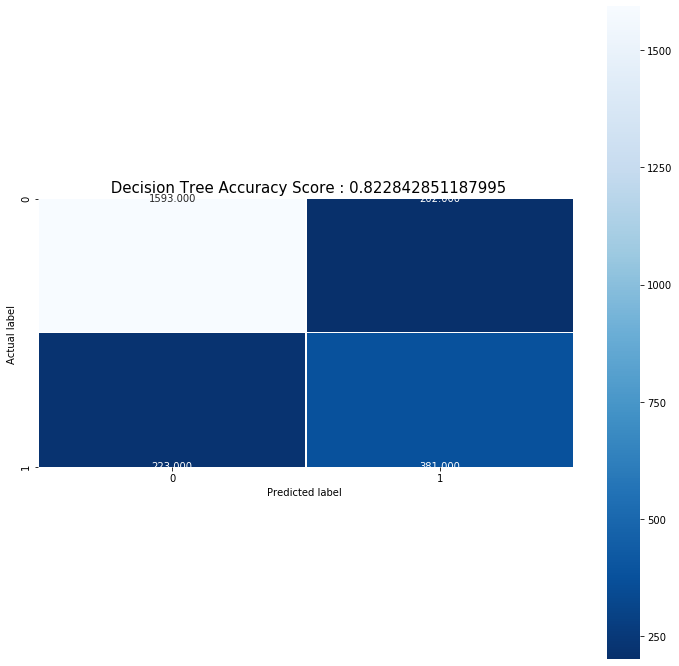

In [79]:
#biểu diễn ma trận nhầm lẫn lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns. heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r' );
plt.ylabel('Actual label '); 
plt.xlabel('Predicted label ') ;
title = ' Decision Tree Accuracy Score : {0}'.format(tree_score)
plt.title(title, size = 15);


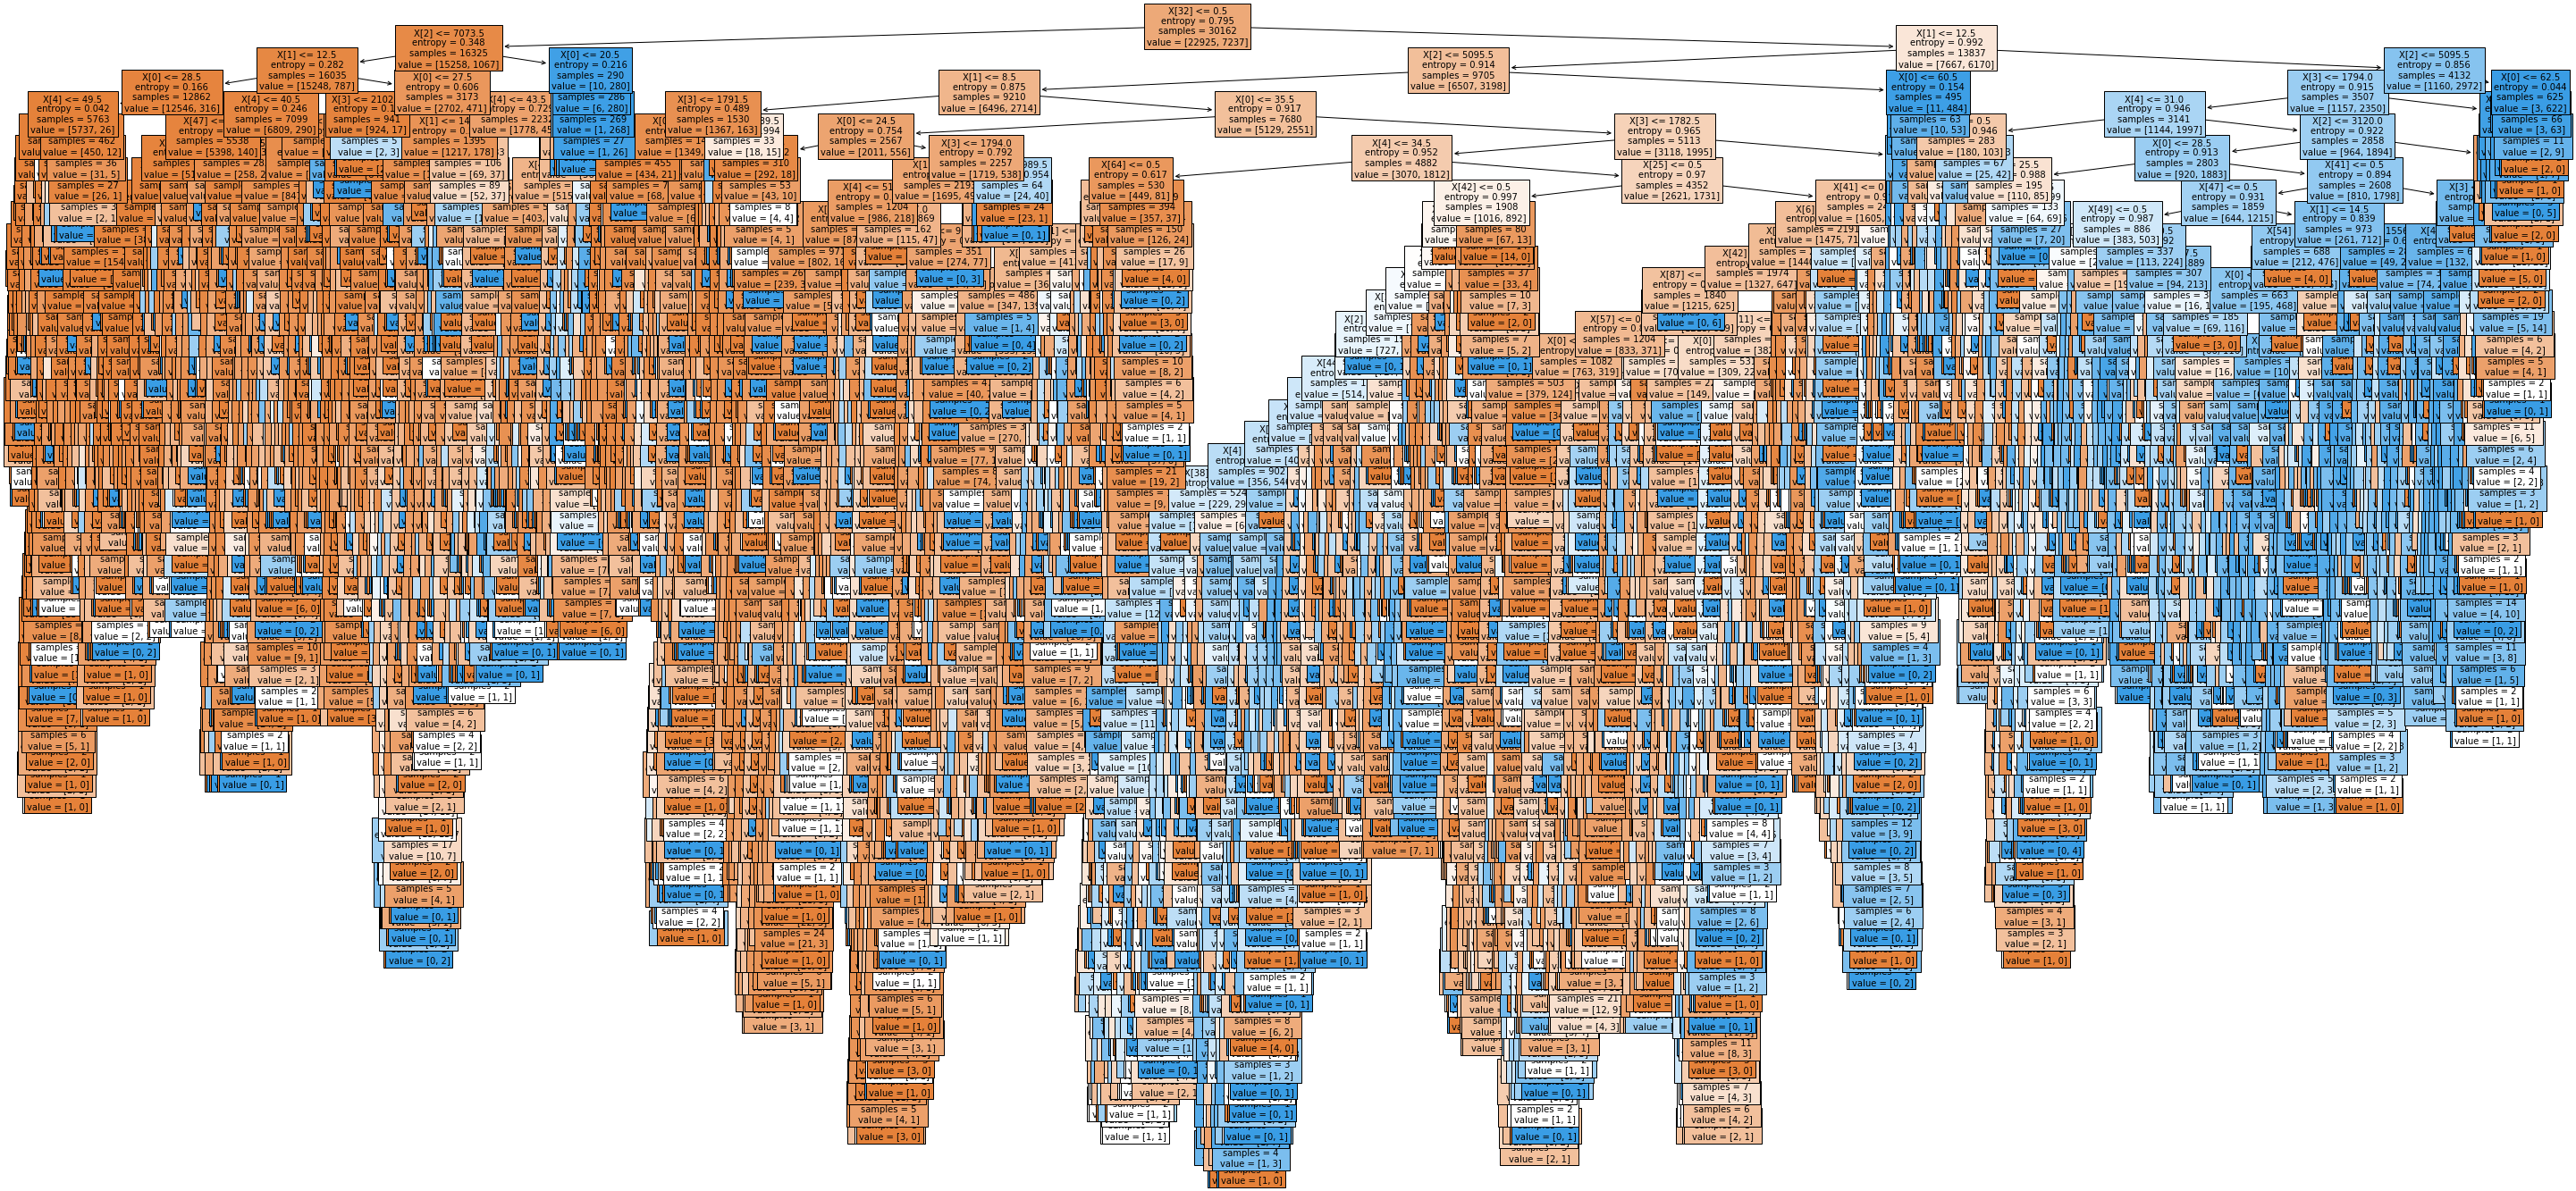

In [80]:
#vẽ cây ID3
fig, ax = plt. subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10) 
plt.savefig(' decision tree', dpi=100)
plt.show()

In [81]:
#Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)


In [82]:
#Tính toán các giá trị của mô hình
bayes_score = metrics.accuracy_score(y_test, bayes_pred) 
print("Accuracy", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))


Accuracy 0.8086702792830346
Report:               precision    recall  f1-score   support

       <=50K       0.94      0.80      0.86      1795
        >50K       0.58      0.84      0.69       604

    accuracy                           0.81      2399
   macro avg       0.76      0.82      0.78      2399
weighted avg       0.85      0.81      0.82      2399



Text(0.5, 1, 'Naive Bayes Accuracy: 0.8086702792830346')

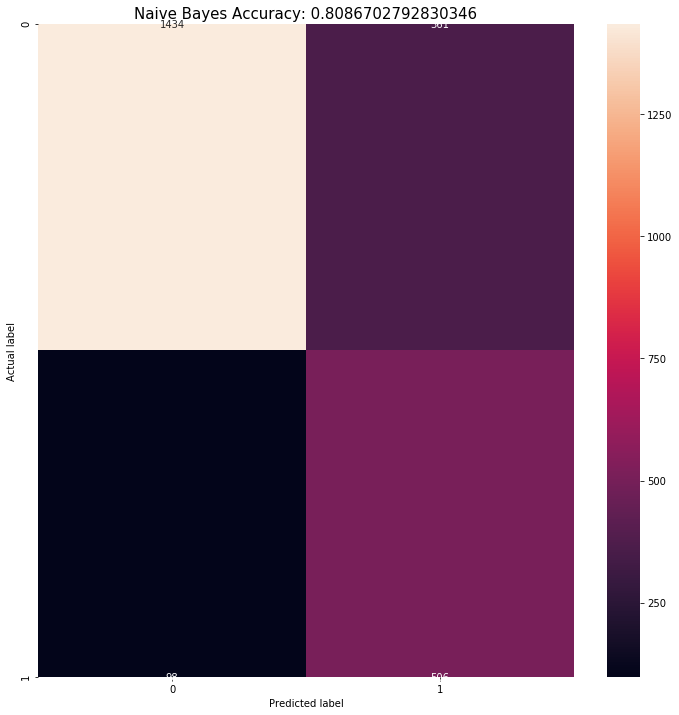

In [109]:
#ma trận nhầm lẫn bằng đồ thị heatmap.
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
fig = plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".0f"); 
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy: {0}'.format(bayes_score) 
plt.title(title,size=15)
